Load the `ISLR2` and `tidyverse` packages.

In [46]:
library(ISLR2)
library(tidyverse)


`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [47]:
glimpse(Auto)



Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


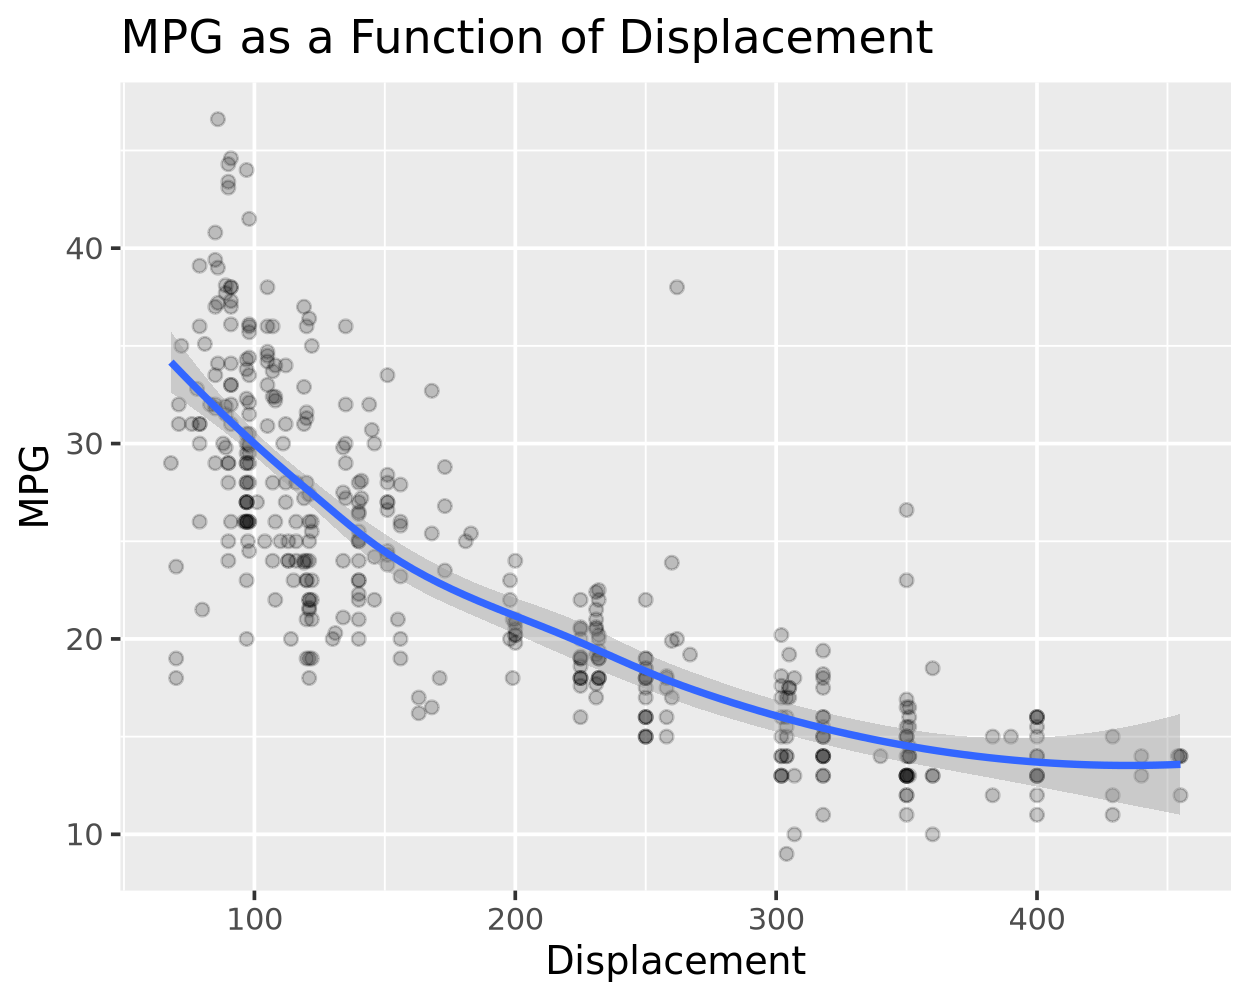

In [48]:
ggplot(Auto, aes(x = displacement, y = mpg)) +
  geom_point(alpha = 0.2) +
  stat_smooth() +
  labs(
    x = "Displacement",
    y = "MPG",
    title = "MPG as a Function of Displacement"
  ) 
 


❓Does the relationship of `mpg` to `displacement` look linear?

The plot shows that mpg decreases as displacement increases, but the decline is not linear. At low displacement values, mpg is relatively high and drops quickly with even small increases in engine size. As displacement moves into the mid-range, mpg continues to decline but at a steadier rate. At high displacement levels, the curve flattens, indicating that mpg remains low with only small changes as displacement increases further. Overall, the relationship is clearly negative and curved rather than straight-line.



Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

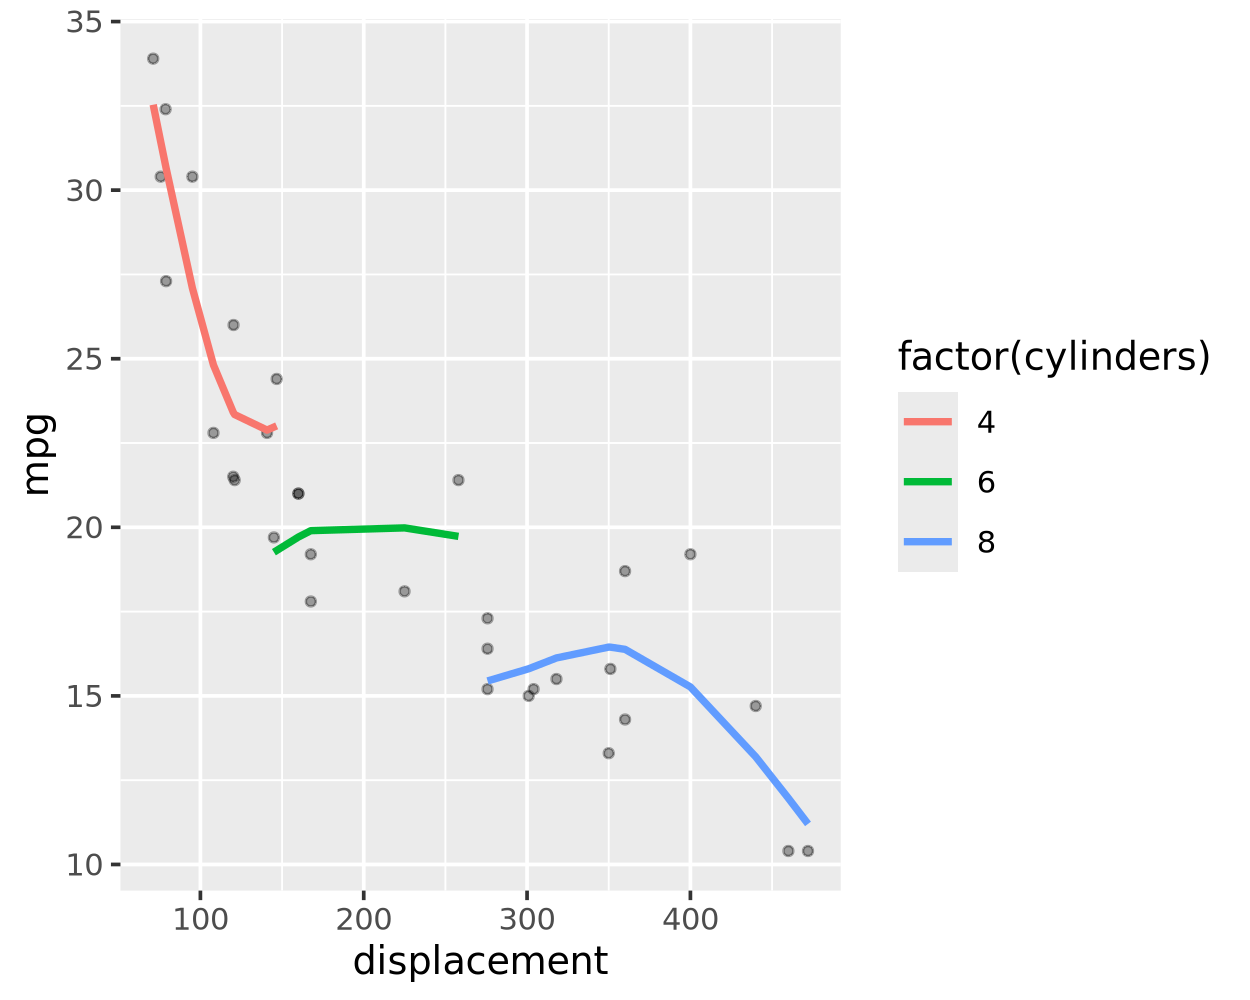

In [81]:
library(tidyverse)
library(tidymodels)

Auto <- mtcars |>
  rename(displacement = disp, cylinders = cyl) |>
  mutate(cylinders = as.numeric(cylinders))

rec <- 
  recipe(mpg ~ displacement + cylinders, data = Auto) |>
  step_ns(displacement, deg_free = 5) |>
  step_mutate(cyl_cat = factor(cylinders)) |>
  step_dummy(cyl_cat) |>
  step_rm(cylinders) |>
  prep()      

train_data <- juice(rec)

mod_fit <-
  linear_reg() |>
  set_engine("lm") |>
  fit(mpg ~ ., data = train_data)

predict(mod_fit, rec |> juice()) |>
  bind_cols(Auto) |>
  ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)


The plot shows a clear negative relationship between engine displacement and fuel efficiency, with mpg decreasing as displacement increases, but the strength and pattern of this decline vary across cylinder groups. Vehicles with 4 cylinders display the highest mpg values overall and show a steep drop in fuel efficiency at lower displacement levels, indicating that even modest increases in engine size have a noticeable impact on their performance. Six-cylinder vehicles maintain more moderate fuel efficiency, with mpg values clustering around 19–20 regardless of displacement, reflecting a flatter trend. In contrast, 8-cylinder vehicles consistently achieve the lowest mpg, and although their decline in fuel efficiency is less steep, they remain well below the other groups across all displacement levels. Together, these patterns show that both displacement and cylinder count play important roles in determining fuel economy: larger, higher-cylinder engines consume more fuel and achieve significantly lower mpg, while smaller engines, especially 4-cylinder models, are more efficient but more sensitive to increases in displacement.